# Classifier comparison
Comparison of different classifiers for given embedding

In [26]:
from pprint import pprint

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties, findfont
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sentence_topology.classification.analysis import analyze_classifier
from sentence_topology.utils.transform import EmbeddingsLoader

In [12]:
EMBEDDINGS = {"paraphrase-multilingual-MiniLM-L12-v2.tsv": "sbert"}
EMBED_DIR = "../embeddings"
CONTEXT_MODE = "diff"
EQUALIZE_TRANS = True
CLASSIFIERS = {
    "sbert": {
        "RandomForestClassifier": RandomForestClassifier(
            max_depth=25,
            n_estimators=200,
            min_samples_split=20,
        ),
        "SVC": make_pipeline(
            StandardScaler(),
            SVC(gamma="auto", kernel="rbf"),
        ),
        "KNeighborsClassifier": make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(n_neighbors=3, weights="distance"),
        ),
    }
}

In [13]:
embed_loader = EmbeddingsLoader(
    EMBED_DIR,
    context_mode=CONTEXT_MODE,
    equalize_trans=EQUALIZE_TRANS,
)

embeds_comparison = {}
for embed_filepath in embed_loader.list_all(tqdm_enable=True):
    if embed_filepath not in EMBEDDINGS:
        continue

    embed_name = EMBEDDINGS[embed_filepath]
    embed = embed_loader.load(embed_filepath)

    analysis_results = {}
    for cls_key, cls in CLASSIFIERS[embed_name].items():
        analysis_results[cls_key] = analyze_classifier(
            embed, cls, cross_validation=True
        )

    embeds_comparison[embed_name] = analysis_results

Processing embeddings:   0%|          | 0/35 [00:00<?, ?it/s]

In [16]:
pprint(embeds_comparison["sbert"])

{'KNeighborsClassifier': ClassifierAnalysisResults(classifier_type=<class 'sklearn.pipeline.Pipeline'>,
                                                   classifier_params={'memory': None,
                                                                      'steps': [('standardscaler',
                                                                                 StandardScaler()),
                                                                                ('kneighborsclassifier',
                                                                                 KNeighborsClassifier(n_neighbors=3, weights='distance'))],
                                                                      'verbose': False},
                                                   confusion_matrix=                       ban  different meaning  formal sentence  future  \
ban                   44.4                0.0              0.2     1.8   
different meaning      0.4                8.4              3.

In [17]:
EMBED_NAME = "sbert"

In [20]:
analysis_results = embeds_comparison[EMBED_NAME]

comp = pd.DataFrame(
    {
        cls_name: analysis.report.loc["f1-score"]
        for cls_name, analysis in analysis_results.items()
    }
)
comp

,RandomForestClassifier,SVC,KNeighborsClassifier
ban,0.806646,0.854639,0.757944
different meaning,0.201129,0.257768,0.151039
formal sentence,0.230878,0.245894,0.153005
future,0.696793,0.753222,0.567361
generalization,0.359105,0.377917,0.052166
minimal change,0.217689,0.146702,0.235668
nonsense,0.207258,0.231419,0.068556
nonstandard sentence,0.245536,0.226534,0.121049
opposite meaning,0.416802,0.393738,0.285451
paraphrase,0.181705,0.094528,0.019189


In [21]:
comp = comp.stack().reset_index()
comp.columns = ["Transformation", "Classifier", "F1-score"]

In [27]:
CM = 1 / 2.54
sns.set_theme(context="paper", style="whitegrid", palette="muted")
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.bbox"] = "tight"

In [28]:
font = findfont(FontProperties(family=["sans-serif"]))

Text(0.5, 1.0, 'Classification F1-scores for SBERT embeddings')

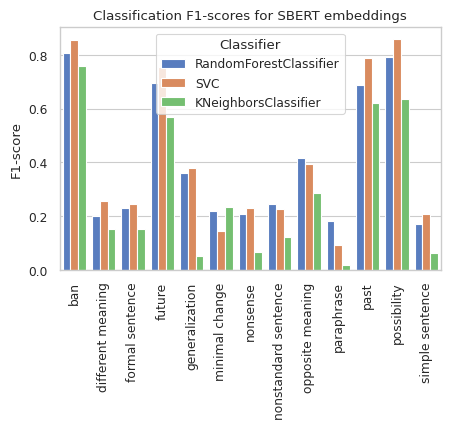

In [30]:
plt.figure(figsize=(12.5 * CM, 8 * CM))
sns.barplot(comp, x="Transformation", y="F1-score", hue="Classifier")
plt.xticks(rotation="vertical")
plt.xlabel("")
plt.title("Classification F1-scores for SBERT embeddings")